In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
boston_dataset = load_boston()
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
boston= pd.DataFrame(data= boston_dataset.data, columns= boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV']= boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
correlation_matrix = boston.corr().round(2)
correlation_matrix['MEDV']

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [ ]:
X= pd.DataFrame(data= np.c_[boston['RM'], boston['LSTAT']], columns =['RM','LSTAT'])
Y= boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_model.coef_

array([ 4.99734079, -0.67359875])

In [ ]:
lin_model.intercept_

-0.22886344819948334

In [ ]:
y_train_predict = lin_model.predict(X_train)
y_test_predict = lin_model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train,y_train_predict)
mse_train

30.88350549843434

In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_train

5.557293000952383

In [ ]:
mse_test =mean_squared_error(y_test,y_test_predict)
mse_test

29.81627773184245

In [ ]:
rmse_test = np.sqrt(mse_test)
rmse_test

5.460428346919539

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print(r2_train,r2_test)

0.6486379416291157 0.59985184477156


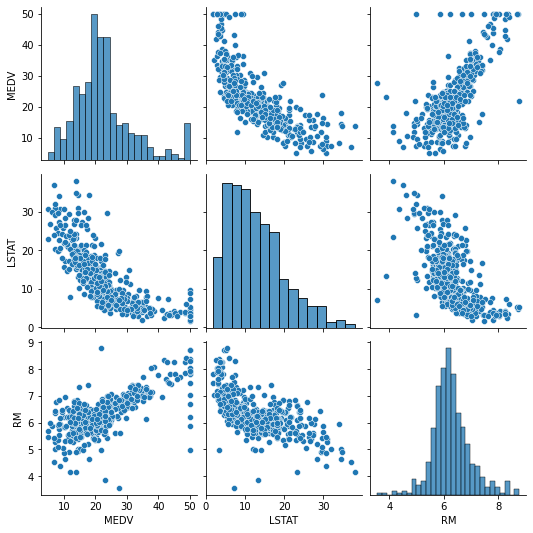

In [ ]:
sns.pairplot(boston[['MEDV','LSTAT','RM']])

In [ ]:
poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
X_train_poly

array([[  1.      ,   6.43    ,   5.21    ,  41.3449  ,  33.5003  ,
         27.1441  ],
       [  1.      ,   6.176   ,  12.04    ,  38.142976,  74.35904 ,
        144.9616  ],
       [  1.      ,   5.682   ,  10.21    ,  32.285124,  58.01322 ,
        104.2441  ],
       ...,
       [  1.      ,   6.635   ,   5.99    ,  44.023225,  39.74365 ,
         35.8801  ],
       [  1.      ,   6.629   ,  23.27    ,  43.943641, 154.25683 ,
        541.4929  ],
       [  1.      ,   6.405   ,  10.63    ,  41.024025,  68.08515 ,
        112.9969  ]])

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model.predict(X_train_poly)
y_test_poly_predict = poly_model.predict(X_test_poly)

In [ ]:
r2_poly_train = r2_score(y_train,y_train_poly_predict)
r2_poly_test = r2_score(y_test,y_test_poly_predict)
print(r2_poly_train,r2_poly_test)

0.7553107581437003 0.7507808550928614
